In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
housing_data = fetch_california_housing()

In [3]:
print(housing_data)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [4]:
housing_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
housing_data.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [6]:
X = pd.DataFrame(housing_data.data, columns= housing_data.feature_names)

In [7]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [8]:
y = pd.DataFrame(housing_data.target, columns=['Target'])

In [9]:
y

,Target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [10]:
X.shape

(20640, 8)

In [11]:
y.shape

(20640, 1)

In [12]:
X.drop(['Latitude','Longitude'], axis=1, inplace=True)

In [13]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467
...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209


In [14]:
X_train_full,X_test,y_train_full,y_test = train_test_split(X,y, random_state=42)

In [15]:
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full, random_state=42)

In [16]:
print(X_train_full.shape)
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(15480, 6)
(11610, 6)
(3870, 6)
(5160, 6)


In [17]:
print(y_train_full.shape)
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(15480, 1)
(11610, 1)
(3870, 1)
(5160, 1)


In [18]:
scalar = StandardScaler()

In [19]:
X_train =scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)
X_valid = scalar.fit_transform(X_valid)

In [20]:
X_train.shape

(11610, 6)

In [21]:
X_train.shape[1:]

(6,)

In [23]:
LAYERS = [tf.keras.layers.Dense(30,activation='relu', input_shape = X_train.shape[1:]),
          tf.keras.layers.Dense(10,activation='relu'),
          tf.keras.layers.Dense(5, activation='relu'),
          tf.keras.layers.Dense(1)]

NameError: name 't' is not defined

In [ ]:
model = tf.keras.models.Sequential(LAYERS)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 30)                210       
                                                                 
 dense_13 (Dense)            (None, 10)                310       
                                                                 
 dense_14 (Dense)            (None, 5)                 55        
                                                                 
 dense_15 (Dense)            (None, 1)                 6         
                                                                 
Total params: 581
Trainable params: 581
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='sgd', loss='mse')

In [ ]:
history = model.fit(X_train,y_train, epochs = 30, validation_data=(X_valid,y_valid),batch_size=32)

Epoch 1/30


363/363 [==============================] - 2s 6ms/step - loss: 0.7991 - val_loss: 0.5532
Epoch 2/30
363/363 [==============================] - 2s 5ms/step - loss: 0.4937 - val_loss: 0.5257
Epoch 3/30
363/363 [==============================] - 2s 5ms/step - loss: 0.4669 - val_loss: 0.5361
Epoch 4/30
363/363 [==============================] - 2s 5ms/step - loss: 0.4568 - val_loss: 0.5172
Epoch 5/30
363/363 [==============================] - 2s 5ms/step - loss: 0.4493 - val_loss: 0.5123
Epoch 6/30
363/363 [==============================] - 2s 5ms/step - loss: 0.4433 - val_loss: 0.5088
Epoch 7/30
363/363 [==============================] - 2s 5ms/step - loss: 0.4427 - val_loss: 0.5077
Epoch 8/30
363/363 [==============================] - 2s 5ms/step - loss: 0.4375 - val_loss: 0.5469
Epoch 9/30
363/363 [==============================] - 2s 5ms/step - loss: 0.4356 - val_loss: 0.4996
Epoch 10/30
363/363 [==============================] - 2s 5ms/step - loss: 0.4312 - val_loss: 0.5064
Epoch 11/3

In [ ]:
pd.DataFrame(history.history)

,loss,val_loss
0,0.799132,0.553159
1,0.493656,0.525676
2,0.466923,0.536066
3,0.456790,0.517195
4,0.449313,0.512295
5,0.443343,0.508802
6,0.442679,0.507702
7,0.437489,0.546851
8,0.435579,0.499647
9,0.431218,0.506444


<Axes: >

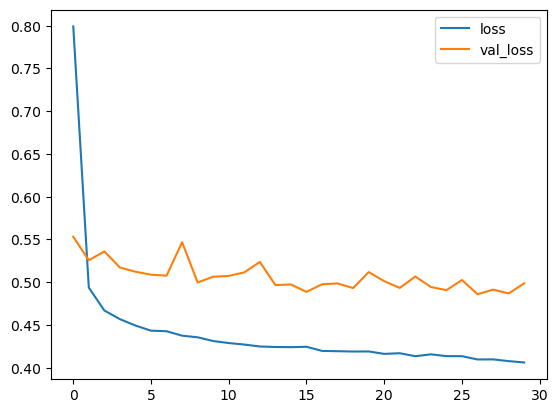

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model.evaluate(X_test,y_test)

162/162 [==============================] - 1s 3ms/step - loss: 0.5030


0.5029792189598083

In [ ]:
new = X_test[2]

In [ ]:
new

array([-0.19475766,  1.85735988, -0.54547279,  0.15860488, -0.09942866,
       -0.98514082])

In [ ]:
model.predict(new.reshape(1,6))

1/1 [==============================] - 0s 237ms/step


array([[5.492181]], dtype=float32)

In [ ]:
y_pred = model.predict(X_test)

162/162 [==============================] - 0s 2ms/step


In [ ]:
y_pred

array([[0.8898798],
       [1.3890365],
       [5.492182 ],
       ...,
       [1.627496 ],
       [3.726757 ],
       [4.325955 ]], dtype=float32)

In [ ]:
y_test.head()

,Target
20046,0.47700
3024,0.45800
15663,5.00001
20484,2.18600
9814,2.78000
